# MTA Customer Feedback Exploratory Analysis for Accessibility 

##### Data

MTA Customer Feedback Data (2014-2020)
[Source Link](https://data.ny.gov/Transportation/MTA-Customer-Feedback-Data-Beginning-2014/tppa-s6t6) |
[Data Dictionary](https://data.ny.gov/api/views/tppa-s6t6/files/647be5e6-126f-47f2-8fa0-6175ccedda89?download=true&filename=MTA_CustomerFeedbackRightNowData_DataDictionary.pdf)

This dataset is generated from the Customer Relationship Management System. This system allows the public to correspond to the MTA about complaints or commendations in a variety of categories. The dataset contains information about areas of customer service and how that service was rated.


##### Data Dictionary
- Agency: The agency referenced in the e-mail; valid values are:
    - Long Island Rail Road
    - Metro-North Railroad
    - NYC Buses
    - Subways
- Commendation or Complaint: Type of Issue (complaint or commendation) referenced in the e-mail; valid values are:
    - Complaint
    - Commendation
- Subject Matter: Subject matter referenced in the e-mail; valid values are:
    - Buses
    - Commendation
    - Complaint
    - Customer
    - Ferry Service – Hudson River
    - MetroCard/Tickets/EZ-Pass & Tolls
    - MTA Agency Cars / Trucks
    - Policies, Rules & Regulations
    - Public Hearing
    - Schedules / Reservations
    - Station/Bus Stop/Facility/Structure
    - Telephone / Web Site / Mobile Apps
    - Trains
    - Travel Disruption / Trip Problem
    
- Subject Detail: The specific area of service referenced in the e-mail
- Issue Detail: The feedback, pre-defined response, or category of the area of service
- Year: The year that the complaint/commendation was entered.
- Month: The month that the complaint/commendation was entered.
- Branch/Line/Route: The branch, line, or route selected by the customer; will appear blank if no selection was made.


<hr>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ORIGINAL_MTA_Customer_Feedback_Data__Beginning_2014.csv')

In [3]:
df.head(2)

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,SIM33C


In [4]:
df.shape

(623757, 8)

In [5]:
# Column Names
# - Replacing empty space between words with an underscore
# - Lowercasing all column names 

df.columns = df.columns.str.replace(' ', '_').str.lower()

In [6]:
# Column Name
# Going to also rename Branch/Line/Route to branch_line_route
df = df.rename(columns={'branch/line/route':'branch_line_route'})

In [7]:
df.head(2)

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,SIM33C


In [8]:
df['agency'].value_counts()

NYC Buses                   300660
Subways                     220800
Long Island Rail Road        53179
Metro-North Railroad         42601
Buses                         6418
MTA Corporate Office            83
MTA Capital Construction        13
Agency                           2
MTA Board                        1
Name: agency, dtype: int64

In [9]:
df['commendation_or_complaint'].value_counts()

Complaint                 598499
Commendation               25256
Commendation/Complaint         2
Name: commendation_or_complaint, dtype: int64

In [10]:
df[df['commendation_or_complaint'] == "Commendation/Complaint"]

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
623755,Agency,Commendation/Complaint,Subject Matter,Subject Detail,Issue Detail,NaN,NaN,Branch / Line / Route
623756,Agency,Commendation/Complaint,Subject Matter,Subject Detail,Issue Detail,NaN,NaN,Branch / Line / Route


In [11]:
complaints_df = df[df['commendation_or_complaint'] == 'Complaint']
print(complaints_df['commendation_or_complaint'].value_counts())
print(complaints_df.shape) 

Complaint    598499
Name: commendation_or_complaint, dtype: int64
(598499, 8)



<b>Note:</b> <b>Data Dictionary Referenced</b> 

Below are the data subcategories for the data label(column) considered valid values by MTA's Data Dictionary




<b> Agency</b>
- Long Island Rail Road
- Metro-North Railroad
- <b>NYC Buses</b>
- <b>Subways</b>

In [12]:
complaints_df['agency'].value_counts()

NYC Buses                   287106
Subways                     213804
Long Island Rail Road        50939
Metro-North Railroad         40567
Buses                         5987
MTA Corporate Office            83
MTA Capital Construction        12
MTA Board                        1
Name: agency, dtype: int64

In [13]:
# Merging Buses to NYC Buses since they are identified that way in the data dictionary document
complaints_df['agency'] = complaints_df['agency'].replace({'Buses': 'NYC Buses'})

/var/folders/3_/8xdbx4ks2kj55t5nl3zg5ff00000gn/T/ipykernel_29191/1142904232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complaints_df['agency'] = complaints_df['agency'].replace({'Buses': 'NYC Buses'})


In [14]:
# Confirming Subways was merged 
complaints_df['agency'].value_counts()

NYC Buses                   293093
Subways                     213804
Long Island Rail Road        50939
Metro-North Railroad         40567
MTA Corporate Office            83
MTA Capital Construction        12
MTA Board                        1
Name: agency, dtype: int64

<b>Since the main focus for this analysis is on NYC Buses and Subways, I will be removing all other agencies from the dataset</b>


<b>Buses:</b>

In [15]:
buses_df = complaints_df[complaints_df['agency'] == 'NYC Buses']

In [16]:
# Confirming that 
buses_df['agency'].value_counts()

NYC Buses    293093
Name: agency, dtype: int64

In [17]:
buses_df['commendation_or_complaint'].value_counts()

Complaint    293093
Name: commendation_or_complaint, dtype: int64

<b> Subways </b>

In [18]:
subways_df = complaints_df[complaints_df['agency'] == 'Subways']

In [19]:
subways_df['agency'].value_counts()

Subways    213804
Name: agency, dtype: int64

In [20]:
subways_df['commendation_or_complaint'].value_counts()

Complaint    213804
Name: commendation_or_complaint, dtype: int64

<hr>

## Buses

<b>Note:</b> <b>Data Dictionary Referenced</b> 

Below are the data subcategories for the data label(column) considered valid values by MTA's Data Dictionary


<b> Subject Matter </b>
- Buses
- Commendation 
- Complaint
- Customer
- Employees
- Ferry Service – Hudson River
- MetroCard/Tickets/EZ-Pass & Tolls 
- MTA Agency Cars / Trucks
- Policies, Rules & Regulations
- Public Hearing
- Schedules / Reservations
- Station/Bus Stop/Facility/Structure 
- Telephone / Web Site / Mobile Apps  Trains
- Travel Disruption / Trip Problem

In [21]:
buses_df = buses_df.reset_index(drop=True)

In [22]:
buses_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
0,NYC Buses,Complaint,Customer,NaN,NaN,2019.0,4.0,Bx13
1,NYC Buses,Complaint,Employee,Bus Operator / Driver,Operating Performance,2019.0,4.0,Bx28
2,NYC Buses,Complaint,Bus,NaN,Appearance / Cleanliness,2019.0,4.0,S74
3,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019.0,4.0,B47
4,NYC Buses,Complaint,Employee,Bus Operator / Driver,NaN,2019.0,4.0,Q100-LTD


In [23]:
buses_df['agency'].value_counts()

NYC Buses    293093
Name: agency, dtype: int64

In [24]:
buses_df['subject_matter'].value_counts()

Employees                                 158619
Travel Disruption / Trip Problem           77981
Buses                                      25703
Station /Bus Stop /Facility /Structure     13565
Telephone / Website / Mobile Apps           3539
Employee                                    3077
Schedules / Reservations                    2524
Service                                     1995
MetroCard/Tickets/E-Zpass & Tolls           1757
Customer                                    1655
Policies, Rules & Regulations               1517
Bus                                          553
Bus Stop                                     270
MTA Agency Cars / Trucks                     139
Complaint                                    107
Reasonable Modification                       40
Other                                         34
Public Hearing                                15
Bus Operator / Driver                          3
Name: subject_matter, dtype: int64

In [25]:
# Employee can be merged to Employees
buses_df['subject_matter'] = buses_df['subject_matter'].replace({'Employee': 'Employees'})


# Bus Operator/Driver can be merged with Employees
buses_df['subject_matter'] = buses_df['subject_matter'].replace({'Bus Operator / Driver': 'Employees'})


# Bus Stop can be merged to Station/Bus Stop/Facility/Structure
buses_df['subject_matter'] = buses_df['subject_matter'].replace({'Bus Stop': 'Station /Bus Stop /Facility /Structure'})


# Bus is merged with Buses
buses_df['subject_matter'] = buses_df['subject_matter'].replace({'Bus': 'Buses'})


In [26]:
# buses_df['subject_matter'].value_counts()

In [27]:
# removes spaces empty spaces between forward slashes 
buses_df['subject_matter'] = buses_df['subject_matter'].str.replace(" /","/")
buses_df['subject_matter'] = buses_df['subject_matter'].str.replace("/ ","/")
buses_df['subject_matter'] = buses_df['subject_matter'].str.replace(" / ","/")


In [28]:
# verifying updates
buses_df['subject_matter'].value_counts()

Employees                              161699
Travel Disruption/Trip Problem          77981
Buses                                   26256
Station/Bus Stop/Facility/Structure     13835
Telephone/Website/Mobile Apps            3539
Schedules/Reservations                   2524
Service                                  1995
MetroCard/Tickets/E-Zpass & Tolls        1757
Customer                                 1655
Policies, Rules & Regulations            1517
MTA Agency Cars/Trucks                    139
Complaint                                 107
Reasonable Modification                    40
Other                                      34
Public Hearing                             15
Name: subject_matter, dtype: int64

In [29]:
buses_df.groupby(['subject_detail']).size()

subject_detail
Advertisement                        3
Advertisements                     344
Agency Car / Truck Driver           95
Air Conditioner / Cooler / Heat     53
Alarm                               29
                                  ... 
Train Operator / Engineer           16
Weapons / Dangerous Instruments      1
Website                            951
Wi-Fi                              235
Windows                            136
Length: 103, dtype: int64

In [30]:
# Removing empty spaces between forward slashes for subject detail column
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace(" / ","/")
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("/ ","/")
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace(" / ","/")


In [31]:
buses_df['subject_detail'].value_counts().nlargest(50).sort_index(ascending=True)

Advertisements                            344
Agency Car/Truck Driver                    95
Air Conditioner/Cooler/Heat                53
Alternate Service/Planned Work             50
Alternate/Substitute Bus                 1017
Bridge/Tunnel/Trestle                      47
Bus Operator/Driver                    154883
Bus Stop                                 4906
Bus Time                                  482
Bus/Vehicle - General                   95220
CSR - Customer Service Office              53
CSR - Telephone                           104
CSR Customer Service Office ( E&C )       729
Clock                                     521
Complaint                                  41
Courtesy                                   77
Customer Shelter                          631
Dispatcher                               1838
Doors (Train, Bus, Facility)              156
Fare/Toll Policy                          771
Farebox                                   534
Horn/Whistle                      

In [32]:
buses_df['subject_detail'].value_counts().nsmallest(50).sort_index(ascending=True)

Advertisement                              3
Alarm                                     29
Alcohol Consumption                        1
Assaulted by Employee                      3
Bicycling/Skating                          9
Bridge/Tunnel                             23
Bus Depot                                 11
Bus Dispatcher                            23
CSR - Ambassador                           5
CSR Customer Service Office (Stone St)    15
Cameras/CCTV                              13
Countdown Clock                           19
Customer Information Screen                9
Customer Service/Behavior                  2
Disputes                                   6
Door                                       1
Employee Actions/Behavior                  1
Employment Policy                         14
Food/Drink                                13
Horn                                       2
Illegal Merchandise Sales                  1
Incorrect Info                             2
Informatio

In [33]:
# Three subcategories with bus dispatcher 
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Bus Dispatcher","Dispatcher")
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Bus Dispatcher ","Dispatcher")
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Bus Operator/Driver", "Dispatcher")

# CSR Customer Service Office ( E&C ) grouped with CSR - Customer Service Office 
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace('CSR Customer Service Office ( E&C )' ,"Customer Service Office", regex=False)

# Three subcategories with tickets, grouping them with Ticket Machines
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Tickets","Ticket Machines")
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Ticket Machine","Ticket Machines")
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Ticket Machiness","Ticket Machines")

# Correct spelling mistake and group with similar group 
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Rude Impropper Language","Rude/Improper Language")

# Published Schedules grouped with Scheduled Service 
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace("Schedules","Scheduled Service")


In [34]:
# buses_df['subject_detail'].value_counts().nlargest(50).sort_index(ascending=True)

In [35]:
# buses_df['subject_detail'].value_counts().nsmallest(50).sort_index(ascending=True)

In [36]:
# create a dataframe with issue detail feature with total counts throughout all years, was taken to excel sheet for further exploration to topic

valuecounts_issue_details = buses_df['issue_detail'].value_counts().to_frame('counts')

In [37]:
valuecounts_issue_details

,counts
Late / Delay,54695
Flagging / Failed To Stop,32880
Rude / Inappropriate Language,25321
Reckless Driving,22918
Failure To Make Scheduled Stop,13085
...,...
No Value,1
Did not adjust boarding location,1
Very Helpful/Friendly,1
Trespass,1


In [38]:
# exported dataframe to csv 
# valuecounts_issue_details.to_csv('value_counts_issue_detail.csv')

In [39]:
# Grouping duplicates with different letter cases in issue_details that were spotted in the csv excel sheet from above


# Accessibility Due To Construction
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Accessibility Due To Construction","Accessibility due to construction")

# Lack of Refused to deploy lift
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Lack of Refused to deploy lift","Refused Lift")

# Dark
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Dark","Too Dark")

# Assaulted by employee
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Assaulted by employee","Assaulted By Employee")

# Failure to make scheduled stop
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Failure to make scheduled stop","Failure To Make Scheduled Stop")

# Not working / Out of service
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Not working / Out of service","Not Working / Out of Service")

# Rude/Inappropriate language
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Rude / Inappropriate Language","Rude/ Inappropriate Language")
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Rude/Inappropriate language","Rude/ Inappropriate Language")


# Schedules is merged with Scheduled Service
buses_df['subject_matter'] = buses_df['subject_matter'].replace({'Schedules ': 'Scheduled Service'})


# ----------------------------------------------------------------------
# Grouped into same group: Availability, Quality, Accuracy of Visual & Audio Information
# Can be referenced in the order list of excel sheet 


# Accuracy / Correctness - Audio
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Accuracy / Correctness - Audio","Availability, Quality, Accuracy of Visual & Audio Information")


# Accuracy / Correctness - Visual / Text
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Accuracy / Correctness - Visual / Text","Availability, Quality, Accuracy of Visual & Audio Information")


# Announcements / Messages
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Announcements / Messages","Availability, Quality, Accuracy of Visual & Audio Information")


# Clarity - Audio
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Clarity - Audio","Availability, Quality, Accuracy of Visual & Audio Information")


# Clarity - Visual / Text
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Clarity - Visual / Text","Availability, Quality, Accuracy of Visual & Audio Information")


# Completeness / Sufficiency - Audio
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Completeness / Sufficiency - Audio","Availability, Quality, Accuracy of Visual & Audio Information")


# Completeness / Sufficiency - Visual/Text
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Completeness / Sufficiency - Visual / Te","Availability, Quality, Accuracy of Visual & Audio Information")

buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Completeness / Sufficiency - Visual/Test","Availability, Quality, Accuracy of Visual & Audio Information")

buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Completeness / Sufficiency - Visual/Text","Availability, Quality, Accuracy of Visual & Audio Information")


# Hard To Read
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Hard To Read","Availability, Quality, Accuracy of Visual & Audio Information")


# Incorrect Information Displayed
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Incorrect Information Displayed","Availability, Quality, Accuracy of Visual & Audio Information")


# Information Not Available
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Information Not Available","Availability, Quality, Accuracy of Visual & Audio Information")


# Lack of information
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Lack of information","Availability, Quality, Accuracy of Visual & Audio Information")


# No Announcement / Messages - Visual/Text
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("No annoucement / messages - Visual / Text","Availability, Quality, Accuracy of Visual & Audio Information")
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("No Announcement / Messages - Visual/Text","Availability, Quality, Accuracy of Visual & Audio Information")


# No Announcement / Messages - Audio
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("No Announcement / Messages - Audio","Availability, Quality, Accuracy of Visual & Audio Information")


# Volume Too Low
buses_df['issue_detail'] = buses_df['issue_detail'].str.replace("Volume Too Low","Availability, Quality, Accuracy of Visual & Audio Information")


In [40]:
buses_df['year'].value_counts()

2019.0    75177
2016.0    60654
2018.0    56066
2017.0    51308
2015.0    28807
2014.0    21081
Name: year, dtype: int64

In [41]:
buses_df['quarter'].value_counts()

2.0    87612
4.0    77774
3.0    67870
1.0    59837
Name: quarter, dtype: int64

In [42]:
# thought about making a borough new column from line routes to see
# which borough has the most complaints, but given the number of 
# no values, 146,092, decided not to move forward with this

buses_df['branch_line_route'].value_counts().sort_values(ascending=False)

No Value       42871
M15             3031
B15             2158
B44             2139
B41             2123
               ...  
Bronx-Bound        1
N41                1
N23                1
N57                1
N55                1
Name: branch_line_route, Length: 518, dtype: int64

## NYC Bus Complaints Data    


In [43]:
buses_df = buses_df.reset_index(drop=True)

In [44]:
buses_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
0,NYC Buses,Complaint,Customer,NaN,NaN,2019.0,4.0,Bx13
1,NYC Buses,Complaint,Employees,Dispatcher,Operating Performance,2019.0,4.0,Bx28
2,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019.0,4.0,S74
3,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019.0,4.0,B47
4,NYC Buses,Complaint,Employees,Dispatcher,NaN,2019.0,4.0,Q100-LTD


In [45]:
buses_df['subject_matter'].value_counts()

Employees                              161699
Travel Disruption/Trip Problem          77981
Buses                                   26256
Station/Bus Stop/Facility/Structure     13835
Telephone/Website/Mobile Apps            3539
Schedules/Reservations                   2524
Service                                  1995
MetroCard/Tickets/E-Zpass & Tolls        1757
Customer                                 1655
Policies, Rules & Regulations            1517
MTA Agency Cars/Trucks                    139
Complaint                                 107
Reasonable Modification                    40
Other                                      34
Public Hearing                             15
Name: subject_matter, dtype: int64

In [46]:
buses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293093 entries, 0 to 293092
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   agency                     293093 non-null  object 
 1   commendation_or_complaint  293093 non-null  object 
 2   subject_matter             293093 non-null  object 
 3   subject_detail             292555 non-null  object 
 4   issue_detail               277711 non-null  object 
 5   year                       293093 non-null  float64
 6   quarter                    293093 non-null  float64
 7   branch_line_route          292202 non-null  object 
dtypes: float64(2), object(6)
memory usage: 17.9+ MB


In [47]:
# buses_df.describe()

In [48]:
# Converting year and quarter columns from float64 to integers 
buses_df = buses_df.astype({"year":'int', "quarter":'int'})

In [49]:
# buses_df.info()

In [50]:
buses_df['subject_matter'].value_counts()

Employees                              161699
Travel Disruption/Trip Problem          77981
Buses                                   26256
Station/Bus Stop/Facility/Structure     13835
Telephone/Website/Mobile Apps            3539
Schedules/Reservations                   2524
Service                                  1995
MetroCard/Tickets/E-Zpass & Tolls        1757
Customer                                 1655
Policies, Rules & Regulations            1517
MTA Agency Cars/Trucks                    139
Complaint                                 107
Reasonable Modification                    40
Other                                      34
Public Hearing                             15
Name: subject_matter, dtype: int64

In [51]:
buses_df['subject_detail'].value_counts()

Dispatcher                   156744
Bus/Vehicle - General         95220
No Value                      10805
Ticket Machines                7214
Bus Stop                       4906
                              ...  
Employee Actions/Behavior         1
Illegal Merchandise Sales         1
Alcohol Consumption               1
Littering                         1
Open Containers                   1
Name: subject_detail, Length: 97, dtype: int64

In [52]:
# saved dataset to a csv file
# buses_df.to_csv('bus_complaints.csv')

In [53]:
buses_df['subject_detail'] = buses_df['subject_detail'].str.replace('No Value', '')

In [54]:
buses_df['subject_detail'].isna().value_counts()

False    292555
True        538
Name: subject_detail, dtype: int64

In [55]:
buses_df['issue_detail'].isna().value_counts()

False    277711
True      15382
Name: issue_detail, dtype: int64

In [56]:
buses_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
0,NYC Buses,Complaint,Customer,NaN,NaN,2019,4,Bx13
1,NYC Buses,Complaint,Employees,Dispatcher,Operating Performance,2019,4,Bx28
2,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019,4,S74
3,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019,4,B47
4,NYC Buses,Complaint,Employees,Dispatcher,NaN,2019,4,Q100-LTD


In [57]:
# total complaints by year 
pd.pivot_table(buses_df, values="agency", index=["year", "quarter"], aggfunc='count')

agency
year quarter        
2014 1          5293
     2          8529
     3          3483
     4          3776
2015 1          4639
     2          5210
     3          4881
     4         14077
2016 1         12634
     2         16629
     3         15715
     4         15676
2017 1         12597
     2         12960
     3         12399
     4         13352
2018 1         11964
     2         13418
     3         15200
     4         15484
2019 1         12710
     2         30866
     3         16192
     4         15409

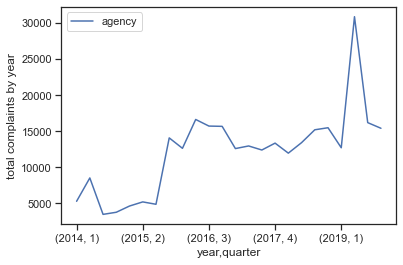

In [58]:
sns.set()
sns.set_style("white")
sns.set_style("ticks")
pd.pivot_table(buses_df, values="agency", index=['year','quarter'], aggfunc='count').plot()
plt.ylabel('total complaints by year');

In [59]:
subject_detail_pv = pd.pivot_table(buses_df,values="year", index='subject_detail', aggfunc='count')


In [60]:
subject_detail_pv = subject_detail_pv.sort_values('year', ascending=False)
subject_detail_pv.head(11)

,year
subject_detail,
Dispatcher,156744
Bus/Vehicle - General,95220
,10805
Ticket Machines,7214
Bus Stop,4906
Scheduled Service,3311
Mobile App,1795
Other,1410
Alternate/Substitute Bus,1017


In [61]:
issue_detail_pv = pd.pivot_table(complaints_df,values="year", index='issue_detail', aggfunc='count')

In [62]:
issues_details_pv = issue_detail_pv.sort_values('year', ascending=False)
issues_details_pv.head(10)

,year
issue_detail,
Late / Delay,54855
Rude / Inappropriate Language,37050
Flagging / Failed To Stop,32898
Improper Function/Needs Repair/Damaged,25847
Other,24386
Reckless Driving,23701
Late / Delay Past,16026
Failure To Make Scheduled Stop,15202
Not Working / Out of Service,14562


In [63]:
issue_pv2 = pd.pivot_table(complaints_df,values='year', index=['issue_detail','quarter'], aggfunc='count')

In [64]:
issue_pv2 = issue_pv2.sort_values('year', ascending=False)
issue_pv2.head(15)

year
issue_detail                           quarter       
Late / Delay                           2.0      18088
                                       4.0      15160
                                       3.0      12561
Rude / Inappropriate Language          2.0      11480
Flagging / Failed To Stop              2.0      10466
A/C Not Available                      3.0       9964
Rude / Inappropriate Language          4.0       9611
Late / Delay                           1.0       9046
Rude / Inappropriate Language          3.0       8310
Other                                  2.0       8129
Flagging / Failed To Stop              4.0       8117
                                       3.0       7988
Reckless Driving                       2.0       7943
Rude / Inappropriate Language          1.0       7649
Improper Function/Needs Repair/Damaged 2.0       7364

## Identifying indicators 

- General Accessibility (direct)
- Mobility Accessibility (direct) — subset of general
- Accessibility (indirect)
- Rider comfort & Service reliability


Notes:
- for those categories flagged directly, depending how many they are, create a bar graph by year 
- counts and total for each year comparing to perecent to bus all related complaints 
- percent of all complaints only on buses 

In [65]:
# General Accessibility (direct)

general_accessibility_categories = [
                                    'Accessibility due to construction',
                                    'Quality, Accuracy of Visual & Audio Information'
                                    'Bypassed Wheelchair',
                                    'Completeness / Sufficiency - Audio',
                                    'Completeness/ Sufficiency - Visual Text',
                                    'Denied access to service animal',
                                    'Departed before mobility customer was secure',
                                    'Did not announce routes/ stops',
                                    'Did not kneel/curb bus to facilitate boarding',
                                    'Did not let disabled customer board',
                                    'Difficulty Boarding / Entering',
                                    'Difficulty Leaving / Exiting',
                                    'Failed to provide satisfactory service to persons with disabilities',
                                    'Failed to Secure Wheelchair',
                                    'Frequency - Audio',
                                    'Frequency - Visual / Text',
                                    'Information Not Available',
                                    'Insists on securing mobility device',
                                    'Refused Lift',
                                    'Refused to waive fare for personal care attendent',
                                    'Requested documentation for service animal',
                                    'Snow / Ice',
                                    'Timeliness - Audio',
                                    'Timeliness - Visual / Text',
                                    'Unable To Exit At Station / Stop',
                                    ]

In [66]:
buses_df['general_accessiblity_direct'] = buses_df['issue_detail'].apply(lambda x: 1 if x in general_accessibility_categories else 0)

In [67]:
buses_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route,general_accessiblity_direct
0,NYC Buses,Complaint,Customer,NaN,NaN,2019,4,Bx13,0
1,NYC Buses,Complaint,Employees,Dispatcher,Operating Performance,2019,4,Bx28,0
2,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019,4,S74,0
3,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019,4,B47,0
4,NYC Buses,Complaint,Employees,Dispatcher,NaN,2019,4,Q100-LTD,0


In [68]:
buses_df['general_accessiblity_direct'].value_counts()

0    289795
1      3298
Name: general_accessiblity_direct, dtype: int64

In [69]:
# Mobility Accessibility (direct) — subset of general

mobil_accessibility_categories = [
                                 'Accessibility due to construction',
                                 'Bypassed Wheelchair',
                                 'Departed before mobility customer was secure',
                                 'Did not kneel/curb bus to facilitate boarding',
                                 'Did not let disabled customer board',
                                 'Difficulty Boarding / Entering',
                                 'Difficulty Leaving / Exiting',
                                 'Failed to provide satisfactory service to persons with disabilities',
                                 'Failed to Secure Wheelchair',
                                 'Insists on securing mobility device',
                                 'Refused Lift',
                                 'Snow / Ice',
                                 'Unable To Exit At Station / Stop',
                                 ]


In [70]:
buses_df['mobility_accessibility_direct_subset_of_general'] = buses_df['issue_detail'].apply(lambda x: 1 if x in mobil_accessibility_categories else 0)


In [71]:
buses_df['mobility_accessibility_direct_subset_of_general'].value_counts()

0    288867
1      4226
Name: mobility_accessibility_direct_subset_of_general, dtype: int64

In [72]:
# Accessibility (indirect)

accessibility_indirect_categories = [
                                    'Accessibility due to construction',
                                    'Dark',
                                    'Did not adjust boarding location',
                                    'Left at Wrong Stop',
                                    'Too Dark'
                                     ]

In [73]:
buses_df['accessibility_indirect'] = buses_df['issue_detail'].apply(lambda x: 1 if x in accessibility_indirect_categories else 0)


In [74]:
buses_df['accessibility_indirect'].value_counts()

0    292221
1       872
Name: accessibility_indirect, dtype: int64

In [75]:
# Rider comfort & Service reliability

rider_comfort_service_categories = [
                                    'A/C Not Available',
                                    'Abandoned bus (intentional)',
                                    'Abandoned Customer at Station/Stop',
                                    'Appearance / Cleanliness',
                                    'Assaulted By Employee',
                                    'Bunching',
                                    'Bypassed Requested Stop',
                                    'Cancelled',
                                    'Cleanliness',
                                    'Closed Door Before Customer Could Board',
                                    'Crowding',
                                    'Customer Service / Behavior',
                                    'Damaged / Defective',
                                    'Early',
                                    'Failure To Make Scheduled Stop',
                                    'Flagging / Failed To Stop',
                                    'Heat Not Available',
                                    'Illegal Parking',
                                    'Improper Function/Needs Repair/Damaged',
                                    'Intent To Harm / Intimidate',
                                    'Late / Delay',
                                    'Litter / Garbage / Debris',
                                    'Long Wait / Long Lines',
                                    'Lost While Driving',
                                    'Noise',
                                    'Not Helpful',
                                    'Not Working/ Out of Service',
                                    'Operating Conditions / Availability',
                                    'Operating Safety',
                                    'Late / Delay',
                                    'Pigeons / Birds',
                                    'Planned Detour',
                                    'Poor Location',
                                    'Rats / Mice',
                                    'Reckless Driving',
                                    'Rude / Inappropriate Language',
                                    'Slow Driving',
                                    'Smoke / Fumes / Smell / Odor',
                                    'Smoking',
                                    'Terminated Route Early',
                                    'Too Cold',
                                    'Too Hot',
                                    'Traffic Delays',
                                    'Transfer Lost',
                                    'Transfer Lost',
                                    'Trip Cancelled',
                                    'Vehicle Breakdown',
                                    ]

In [76]:
buses_df['rider_comfort_and_service_reliability'] = buses_df['issue_detail'].apply(lambda x: 1 if x in rider_comfort_service_categories else 0)


In [77]:
buses_df['rider_comfort_and_service_reliability'].value_counts()

1    187146
0    105947
Name: rider_comfort_and_service_reliability, dtype: int64

In [78]:
buses_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route,general_accessiblity_direct,mobility_accessibility_direct_subset_of_general,accessibility_indirect,rider_comfort_and_service_reliability
0,NYC Buses,Complaint,Customer,NaN,NaN,2019,4,Bx13,0,0,0,0
1,NYC Buses,Complaint,Employees,Dispatcher,Operating Performance,2019,4,Bx28,0,0,0,0
2,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019,4,S74,0,0,0,1
3,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019,4,B47,0,0,0,1
4,NYC Buses,Complaint,Employees,Dispatcher,NaN,2019,4,Q100-LTD,0,0,0,0


## Indicator Tables by Year

In [79]:
buses_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route,general_accessiblity_direct,mobility_accessibility_direct_subset_of_general,accessibility_indirect,rider_comfort_and_service_reliability
0,NYC Buses,Complaint,Customer,NaN,NaN,2019,4,Bx13,0,0,0,0
1,NYC Buses,Complaint,Employees,Dispatcher,Operating Performance,2019,4,Bx28,0,0,0,0
2,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019,4,S74,0,0,0,1
3,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019,4,B47,0,0,0,1
4,NYC Buses,Complaint,Employees,Dispatcher,NaN,2019,4,Q100-LTD,0,0,0,0


In [80]:
# General Accessibility(Direct)

general_accessibility_by_year = buses_df[buses_df['general_accessiblity_direct'] == 1.0 ]


general_accessibility_by_year = pd.pivot_table(general_accessibility_by_year,columns="year", values="general_accessiblity_direct",index='issue_detail' ,aggfunc='count')
general_accessibility_by_year

year,2014,2015,2016,2017,2018,2019
issue_detail,,,,,,
Accessibility due to construction,28.0,72.0,72.0,14.0,45.0,34.0
Denied access to service animal,NaN,NaN,NaN,NaN,NaN,34.0
Departed before mobility customer was secure,NaN,NaN,NaN,NaN,3.0,32.0
Did not announce routes/ stops,NaN,NaN,NaN,NaN,2.0,16.0
Did not kneel/curb bus to facilitate boarding,NaN,NaN,NaN,NaN,3.0,239.0
Did not let disabled customer board,NaN,NaN,NaN,NaN,NaN,27.0
Difficulty Boarding / Entering,20.0,31.0,35.0,14.0,30.0,34.0
Difficulty Leaving / Exiting,11.0,12.0,10.0,13.0,4.0,8.0
Failed to Secure Wheelchair,NaN,NaN,20.0,80.0,64.0,42.0


In [81]:
# Mobility Accessibility (direct) — subset of general

mobility_accessibility_by_year = buses_df[buses_df['mobility_accessibility_direct_subset_of_general'] == 1.0 ]

mobility_accessibility_by_year = pd.pivot_table(mobility_accessibility_by_year, columns="year", values="mobility_accessibility_direct_subset_of_general",index='issue_detail' ,aggfunc='count')
mobility_accessibility_by_year

year,2014,2015,2016,2017,2018,2019
issue_detail,,,,,,
Accessibility due to construction,28.0,72.0,72.0,14.0,45.0,34.0
Bypassed Wheelchair,140.0,173.0,181.0,180.0,163.0,327.0
Departed before mobility customer was secure,NaN,NaN,NaN,NaN,3.0,32.0
Did not kneel/curb bus to facilitate boarding,NaN,NaN,NaN,NaN,3.0,239.0
Did not let disabled customer board,NaN,NaN,NaN,NaN,NaN,27.0
Difficulty Boarding / Entering,20.0,31.0,35.0,14.0,30.0,34.0
Difficulty Leaving / Exiting,11.0,12.0,10.0,13.0,4.0,8.0
Failed to Secure Wheelchair,NaN,NaN,20.0,80.0,64.0,42.0
Failed to provide satisfactory service to persons with disabilities,NaN,NaN,NaN,NaN,34.0,333.0


In [82]:
# Accessibility (indirect)

indirect_accessibility_by_year = buses_df[buses_df['accessibility_indirect'] == 1 ]


indirect_accessibility_by_year = pd.pivot_table(indirect_accessibility_by_year,columns="year", values="accessibility_indirect",index='issue_detail' ,aggfunc='count')
indirect_accessibility_by_year

year,2014,2015,2016,2017,2018,2019
issue_detail,,,,,,
Accessibility due to construction,28.0,72.0,72.0,14.0,45.0,34.0
Did not adjust boarding location,NaN,NaN,NaN,NaN,NaN,1.0
Left at Wrong Stop,120.0,81.0,104.0,57.0,112.0,50.0
Too Dark,8.0,13.0,26.0,11.0,13.0,11.0


In [83]:
# Rider comfort & Service reliability

rider_comfort_service_reliability_by_year = buses_df[buses_df['rider_comfort_and_service_reliability'] == 1 ]


rider_comfort_service_reliability_by_year = pd.pivot_table(rider_comfort_service_reliability_by_year, columns="year", values="rider_comfort_and_service_reliability",index='issue_detail' ,aggfunc='count')
rider_comfort_service_reliability_by_year

year,2014,2015,2016,2017,2018,2019
issue_detail,,,,,,
A/C Not Available,53.0,97.0,153.0,152.0,273.0,163.0
Abandoned Customer at Station/Stop,348.0,664.0,1789.0,1437.0,2014.0,816.0
Abandoned bus (intentional),23.0,118.0,166.0,122.0,176.0,75.0
Appearance / Cleanliness,NaN,NaN,NaN,NaN,NaN,122.0
Assaulted By Employee,20.0,10.0,31.0,29.0,43.0,29.0
Bunching,NaN,NaN,720.0,791.0,796.0,373.0
Bypassed Requested Stop,135.0,535.0,842.0,629.0,744.0,1321.0
Cancelled,16.0,43.0,9.0,NaN,NaN,NaN
Cleanliness,55.0,164.0,207.0,176.0,164.0,215.0


In [84]:
#  Exporting all four tables as csv

# general_accessibility_by_year.to_csv('general_accessibility_by_year.csv')

# mobility_accessibility_by_year.to_csv('mobility_accessibility_by_year.csv')

# indirect_accessibility_by_year.to_csv('indirect_accessibility_by_year.csv')

# rider_comfort_service_reliability_by_year.to_csv('rider_comfort_service_reliability_by_year.csv')


<hr>

## Subways

In [85]:
subways_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
20479,Subways,Complaint,Station /Bus Stop /Facility /Structure,Station - General,Homeless Present,2019.0,4.0,J
20480,Subways,Complaint,Station,Elevator,Operating Conditions / Availability,2019.0,4.0,D
20481,Subways,Complaint,Customer,NaN,Customer Actions / Behavior,2019.0,4.0,E
20482,Subways,Complaint,Employee,Station Agent / Wayfinder,Customer Service / Behavior,2019.0,4.0,A
20483,Subways,Complaint,Employee,Station Agent / Wayfinder,Customer Service / Behavior,2019.0,4.0,6


In [86]:
subways_df['commendation_or_complaint'].value_counts()

Complaint    213804
Name: commendation_or_complaint, dtype: int64

In [87]:
# reindexing the dataframe
subways_df = subways_df.reset_index()

In [88]:
# dropping index column from original dataframe

subways_df.drop('index',inplace=True, axis=1)

In [89]:
subways_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213804 entries, 0 to 213803
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   agency                     213804 non-null  object 
 1   commendation_or_complaint  213804 non-null  object 
 2   subject_matter             213804 non-null  object 
 3   subject_detail             212209 non-null  object 
 4   issue_detail               187657 non-null  object 
 5   year                       213804 non-null  float64
 6   quarter                    213804 non-null  float64
 7   branch_line_route          212859 non-null  object 
dtypes: float64(2), object(6)
memory usage: 13.0+ MB


In [90]:
# Converting year and quarter columns from float64 to integers 
subways_df = subways_df.astype({"year":'int', "quarter":'int'})

In [91]:
subways_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
0,Subways,Complaint,Station /Bus Stop /Facility /Structure,Station - General,Homeless Present,2019,4,J
1,Subways,Complaint,Station,Elevator,Operating Conditions / Availability,2019,4,D
2,Subways,Complaint,Customer,NaN,Customer Actions / Behavior,2019,4,E
3,Subways,Complaint,Employee,Station Agent / Wayfinder,Customer Service / Behavior,2019,4,A
4,Subways,Complaint,Employee,Station Agent / Wayfinder,Customer Service / Behavior,2019,4,6


In [92]:
subways_df['subject_matter'].value_counts()

Station /Bus Stop /Facility /Structure    72340
Trains                                    38092
Travel Disruption / Trip Problem          36947
Employees                                 28427
Customer                                  11162
Telephone / Website / Mobile Apps          5957
Policies, Rules & Regulations              5046
MetroCard/Tickets/E-Zpass & Tolls          4648
Schedules / Reservations                   3906
Station                                    2796
Construction / Capital Projects            1337
Train                                      1234
Service                                     811
Employee                                    703
MTA Agency Cars / Trucks                    223
Complaint                                    89
Reasonable Modification                      36
Public Hearing                               23
Other                                        17
Facility                                     10
Name: subject_matter, dtype: int64

In [93]:
# subways_df['subject_detail'].value_counts().nlargest(60)

In [94]:
# subways_df['subject_detail'].value_counts().nsmallest(52)

In [95]:
# grouping elevator and elevators together
subways_df['subject_detail'] = subways_df['subject_detail'].replace({'Elevator': 'Elevators'})

<b> Since we are only interested in seeing subject details related to elevators, the dataframe will be updated with only those cases for further data cleaning </b>

In [96]:
subways_df = subways_df[subways_df['subject_detail'] == 'Elevators']

In [97]:
subways_df.shape

(3480, 8)

In [98]:
# reindexing the dataframe
subways_df = subways_df.reset_index()

In [99]:
# dropping index column from original dataframe

subways_df.drop('index',inplace=True, axis=1)

In [100]:
subways_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
0,Subways,Complaint,Station,Elevators,Operating Conditions / Availability,2019,4,D
1,Subways,Complaint,Station,Elevators,Operating Conditions / Availability,2019,4,Q
2,Subways,Complaint,Station,Elevators,Operating Conditions / Availability,2019,4,J
3,Subways,Complaint,Station,Elevators,Operating Conditions / Availability,2019,4,7
4,Subways,Complaint,Station,Elevators,Operating Conditions / Availability,2019,4,4


In [101]:
subways_df.shape

(3480, 8)

In [102]:
subways_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   agency                     3480 non-null   object
 1   commendation_or_complaint  3480 non-null   object
 2   subject_matter             3480 non-null   object
 3   subject_detail             3480 non-null   object
 4   issue_detail               3431 non-null   object
 5   year                       3480 non-null   int64 
 6   quarter                    3480 non-null   int64 
 7   branch_line_route          3461 non-null   object
dtypes: int64(2), object(6)
memory usage: 217.6+ KB


In [103]:
subways_df['issue_detail'].isna().value_counts()

False    3431
True       49
Name: issue_detail, dtype: int64

In [104]:
subways_df['issue_detail'].value_counts().nlargest(25)

Improper Function/Needs Repair/Damaged    1846
Not Working / Out of Service               476
Litter / Garbage / Debris                  191
Add More / Not Enough                      173
Leaking / Wet                              158
Accessibility Due To Construction          154
Operating Conditions / Availability        114
Smoke / Fumes / Smell / Odor                93
Difficulty Boarding / Entering              33
Difficulty Leaving / Exiting                30
Homeless Present                            29
Crowding                                    23
Too Hot                                     21
Noise                                       20
Appearance / Cleanliness                    18
Unauthorized / Criminal Activity            13
Poor Location                                9
Dark                                         9
Duration of Construction                     7
Insects                                      4
Rats / Mice                                  3
Other Animals

In [105]:
elevator_df = pd.pivot_table(subways_df,
               columns="year",
               index='issue_detail',
               aggfunc='count')


In [106]:
elevator_df

agency                             \
year                                     2014  2015   2016   2017   2018   
issue_detail                                                               
Accessibility Due To Construction         2.0   5.0    6.0    5.0    3.0   
Add More / Not Enough                     9.0  18.0   17.0   32.0   32.0   
Announcements / Messages                  NaN   NaN    NaN    NaN    NaN   
Appearance / Cleanliness                  NaN   NaN    NaN    NaN    NaN   
Bumpy Ride / Vibrations                   NaN   NaN    2.0    NaN    NaN   
Crowding                                  1.0   1.0    4.0    8.0    6.0   
Dark                                      NaN   NaN    1.0    3.0    NaN   
Difficulty Boarding / Entering            NaN   6.0    3.0    7.0    5.0   
Difficulty Leaving / Exiting              NaN   2.0    8.0    9.0    8.0   
Duration of Construction                  NaN   NaN    NaN    1.0    1.0   
Homeless Present                          1.0   3.0    7.0    7.0    5.0   
Improper Function/Needs Repair/Damaged   44.0  82.0  352.0  466.0  415.0   
Insects                                   2.0   NaN    1.0    NaN    1.0   
Leaking / Wet                             2.0   6.0    9.0   72.0   35.0   
Litter / Garbage / Debris                12.0  16.0   39.0   47.0   37.0   
Noise                                     4.0   3.0    3.0    5.0    2.0   
Not Working / Out of Service              NaN   NaN    NaN    NaN    NaN   
Operating Conditions / Availability       NaN   NaN    NaN    NaN    NaN   
Other Animals                             NaN   NaN    1.0    NaN    2.0   
Poor Location                             NaN   NaN    2.0    4.0    3.0   
Rats / Mice                               1.0   NaN    NaN    NaN    1.0   
Smoke / Fumes / Smell / Odor              2.0   9.0   17.0   20.0   16.0   
Snow / Ice                                NaN   NaN    1.0    NaN    NaN   
Too Hot                                   NaN   1.0    6.0    5.0    6.0   
Unauthorized / Criminal Activity          NaN   2.0    3.0    1.0    3.0   

                                              branch_line_route               \
year                                     2019              2014  2015   2016   
issue_detail                                                                   
Accessibility Due To Construction       133.0               2.0   5.0    6.0   
Add More / Not Enough                    65.0               9.0  18.0   17.0   
Announcements / Messages                  1.0               NaN   NaN    NaN   
Appearance / Cleanliness                 18.0               NaN   NaN    NaN   
Bumpy Ride / Vibrations                   NaN               NaN   NaN    2.0   
Crowding                                  3.0               1.0   1.0    4.0   
Dark                                      5.0               NaN   NaN    1.0   
Difficulty Boarding / Entering           12.0               NaN   6.0    3.0   
Difficulty Leaving / Exiting              3.0               NaN   2.0    8.0   
Duration of Construction                  5.0               NaN   NaN    NaN   
Homeless Present                          6.0               1.0   3.0    7.0   
Improper Function/Needs Repair/Damaged  487.0              44.0  82.0  352.0   
Insects                                   NaN               2.0   NaN    1.0   
Leaking / Wet                            34.0               2.0   6.0    9.0   
Litter / Garbage / Debris                40.0              12.0  16.0   39.0   
Noise                                     3.0               4.0   3.0    3.0   
Not Working / Out of Service            476.0               NaN   NaN    NaN   
Operating Conditions / Availability     114.0               NaN   NaN    NaN   
Other Animals                             NaN               NaN   NaN    1.0   
Poor Location                             NaN               NaN   NaN    2.0   
Rats / Mice                               1.0               1.0   NaN 

In [107]:
# elevator_df.to_csv('subway_elevators.csv')

In [108]:
elevator_by_year_df = pd.pivot_table(subways_df,
               columns="year",
               values='agency',
               aggfunc='count')
elevator_by_year_df

year,2014,2015,2016,2017,2018,2019
agency,86,162,485,700,587,1460


In [109]:
# elevator_by_year_df.to_csv('elevator_by_year.csv')